In [1]:
import pandas as pd
import numpy as np
import time, random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define Functions

In [2]:
iter_num = 100
col_num = 100

## List Append

In [3]:
def list_append():
    time_start = time.time()

    list_temp = []
    for i in range(iter_num):
        list_array = []
        for c in range(col_num):
            list_array.append(random.randint(50, 100))
        list_temp.append(list_array)

    df = pd.DataFrame(list_temp)
    time_delta = time.time() - time_start
    
    return time_delta

## Pandas from_dict

### key='columns' (default)

In [4]:
def from_dict_columns():
    time_start = time.time()

    dict_col = {}
    for c in range(col_num):
        dict_col[c] = []
    
    for i in range(iter_num):
        for c in range(col_num):
            num = random.randint(50, 100)
            dict_col[c].append(num)

    df = pd.DataFrame.from_dict(dict_col, orient='columns')
    time_delta = time.time() - time_start
    
    return time_delta

### key='index'

In [5]:
def from_dict_index():
    time_start = time.time()

    dict_idx = {}
    for i in range(iter_num):
        list_array = []
        for c in range(col_num):
            list_array.append(random.randint(50, 100))
        dict_idx[i] = list_array

    df = pd.DataFrame.from_dict(dict_idx, orient='index')
    time_delta = time.time() - time_start
    
    return time_delta

# Iter Functions

In [6]:
func_num = 1000

In [7]:
list_funcs = ['list_append', 'from_dict_columns', 'from_dict_index']
dict_funcs = {}

In [8]:
for funcs in list_funcs:
    list_sec = []
    for i in tqdm(range(func_num)):
        list_sec.append(eval(funcs)())
    dict_funcs[funcs] = list_sec

100%|██████████| 1000/1000 [00:08<00:00, 113.72it/s]


# Display Results

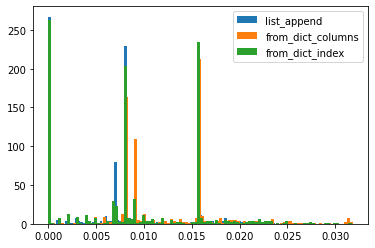

In [9]:
dict_results = {}
for key, list_secs in dict_funcs.items():
    plt.hist(list_secs, bins=100, label=key)
    dict_results[key] = [np.average(list_secs), np.var(list_secs), np.median(list_secs)]
plt.legend()
plt.show()

In [10]:
df_results = pd.DataFrame.from_dict(dict_results, orient='index', columns=['Ave.', 'Var.', 'Med.'])

In [11]:
df_results

,Ave.,Var.,Med.
list_append,0.008111,0.000041,0.007973
from_dict_columns,0.009339,0.000051,0.008951
from_dict_index,0.008688,0.000048,0.007974
